In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("cat_dog.csv")

In [3]:
data

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


# Copying images to training, validation, and test directories

In [4]:

    
import os, shutil
original_dataset_dir = 'C:/Users/Lab02R03Pc19/Desktop/pc/dogs-vs-cats'

# Make Dircatories

In [6]:
base_dir = 'C:/Users/Lab02R03Pc19/Desktop/pc/dogs-vs-cats/cats_and_dogs_small'
os.mkdir(base_dir)

# Make Three Folder Like Train Test Validate

In [7]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Make Two other(cat, dog)  Folder in Folder Like Train Test Validate 

In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
# fnames = [f'cat.{i}.jpg' for i in range(1000)]
# for fname in fnames:
# src = os.path.join(original_dataset_dir, fname)
# dst = os.path.join(train_cats_dir, fname)
# shutil.copyfile(src, dst)

# Data put in make dircatiories

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+"/train", fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fname

'cat.999.jpg'

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+"/train", fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fname

'cat.1499.jpg'

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+"/train", fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fname

'cat.1999.jpg'

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#     src = os.path.join('r''C:\Users\Lab02R03Pc19\Desktop\pc\dogs-vs-cats\test', fname)
    src = os.path.join(original_dataset_dir+"/train", fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+"/train", fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+"/train", fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Check Data of image put in folder

In [18]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [19]:
 print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [20]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [21]:
 print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [22]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [23]:
 print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


# Instantiating a small convnet for dogs vs. cats classification

In [24]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
#channnel 1 gray scale 3 color image                        
#picutre chutiie hu to padding use kern ge
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# Configuring the model for training

In [26]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [39]:
#Generator memory me 10 lac iam ho to model ko pass ker ni hn ho ga kya ke memory me se img loade ho ge to ek ek load ho ge ni 
#  memory beth
    
    
#one by img uplode ker ta hn    

IndentationError: unexpected indent (Temp/ipykernel_9520/3843753313.py, line 2)

In [ ]:
# python Generator

#IteratORS
#collection of list  se ek element nikly te 


#range(2,20) RANGE IS GENTRATOR FUNCTION

#fpr loop is on ilartore 

#value genrate  with ilteratore 

In [29]:
# define a list
my_list = [4, 7, 0]



# create an iterator from the list
iterator = iter(my_list)
print(iterator)
# get the first element of the iterator
print(next(iterator))  # prints 4

# get the second element of the iterator
print(next(iterator))  # prints 7

# get the third element of the iterator
print(next(iterator))  # prints 0

4
7
0


# Using ImageDataGenerator to read images from directories

In [32]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fitting the model using a batch generator

In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

C:\Users\LAB02R~1\AppData\Local\Temp/ipykernel_10244/775559235.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 28s 276ms/step - loss: 0.6880 - acc: 0.5255 - val_loss: 0.6656 - val_acc: 0.6450
Epoch 2/30
100/100 [==============================] - 23s 226ms/step - loss: 0.6480 - acc: 0.6315 - val_loss: 0.6492 - val_acc: 0.5830
Epoch 3/30
100/100 [==============================] - 23s 228ms/step - loss: 0.5896 - acc: 0.6780 - val_loss: 0.6093 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 23s 230ms/step - loss: 0.5578 - acc: 0.7195 - val_loss: 0.6315 - val_acc: 0.6410
Epoch 5/30
100/100 [==============================] - 23s 230ms/step - loss: 0.5295 - acc: 0.7295 - val_loss: 0.5795 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 23s 231ms/step - loss: 0.5002 - acc: 0.7535 - val_loss: 0.5850 - val_acc: 0.6800
Epoch 7/30
100/100 [==============================] - 23s 230ms/step - loss: 0.4774 - acc: 0.7760 - val_loss: 0.6234 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 2

# Saving the model

In [37]:
model.save('cats_and_dogs_small_1.h5')

# Displaying curves of loss and accuracy during training

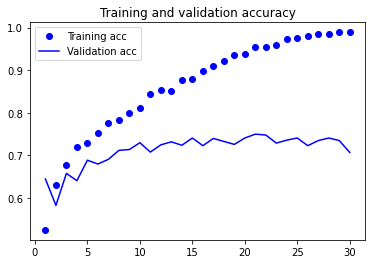

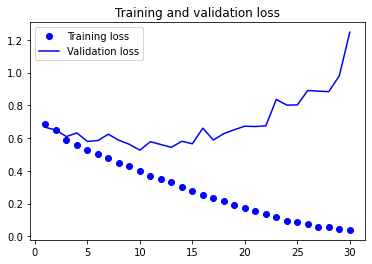

In [39]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



# Setting up a data augmentation configuration via ImageDataGenerator

In [40]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# Displaying some randomly augmented training images

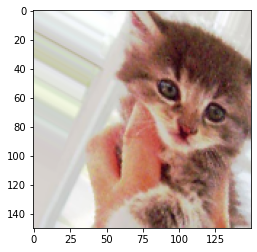

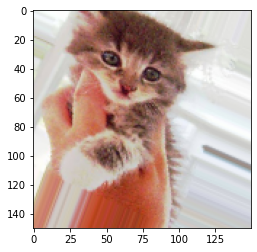

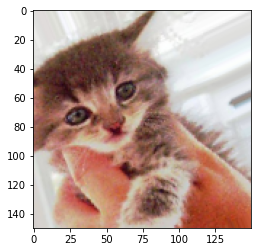

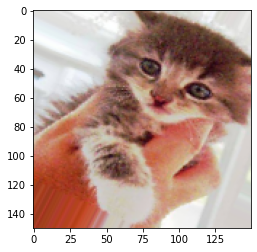

In [46]:
import keras.utils as image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

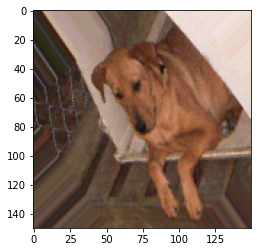

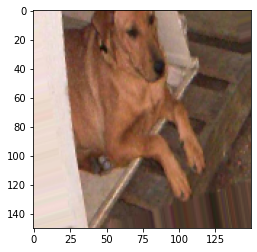

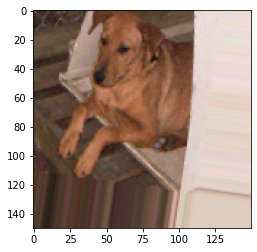

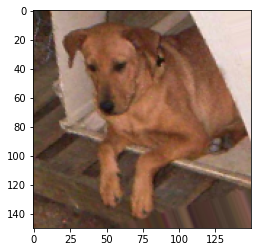

In [50]:
import keras.utils as image
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()